In [41]:
# imports

import csv
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
portfolios = {}
# example:
# portfolios["old_timers"] # portfolio
# portfolios["old_timers"]["Tobin Portfolio"] = [quantity, price]

In [36]:
# go through and collect the data into python arrays
with open('portfolios.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    count = 0
    current_portfolio_name = None
    skip_again = False
    for row in csv_reader:
        if skip_again:
            skip_again = False
            continue
        if row[0] != "" and row[0][0] == "(":
            current_portfolio_name = row[0][2:-1]
            portfolios[current_portfolio_name] = {}
            
            skip_again = True
            # then go onto next line
            continue
        if current_portfolio_name is not None:
            asset_name = row[0]
            quantity = float(row[1])
            price = float(row[4])
            portfolios[current_portfolio_name][asset_name] = [quantity, price]


In [37]:
quantities_and_prices = []

for portfolio_name in portfolios.keys():
    portfolio = portfolios[portfolio_name]
    for asset_name in portfolio.keys():
        quantity, price = portfolio[asset_name]
        point = (quantity, price)
        quantities_and_prices.append(point)

In [38]:
# sort by the prices
sorted_quantities_and_prices = sorted(quantities_and_prices, key=lambda x: x[1])


In [44]:
x_quantities = np.array([i[0] for i in sorted_quantities_and_prices])
# sum of quantities
sum_of_quants = []
running_sum = 0
for q in x_quantities:
    running_sum += q
    sum_of_quants.append(running_sum)
sum_of_quants = np.array(sum_of_quants)

y_prices = np.array([i[1] for i in sorted_quantities_and_prices])

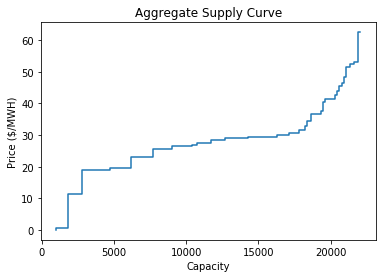

In [47]:
plt.step(sum_of_quants, y_prices)
plt.title("Aggregate Supply Curve")
plt.xlabel('Capacity')
plt.ylabel('Price ($/MWH)')
plt.show()